## Deaths By States

| File | Sheet Name | Represents |
| :---: | :---: | :---: |
| sonderauswertung-sterbefaelle.xlsx | D_2016-2021_Monate_AG_Ins | Deaths per age group in each months |
|  | BL_2016_2021_Monate_AG_Ins | Deaths per states in each months |
| 02-bundeslaender.xlsx | Bundesländer_mit_Hauptstädten | Population and Population density by state |


In [71]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import mplcursors
from IPython.display import display

In [72]:
# Translations and mapping dictionaries
LANG = 'en' # 'de' 'en'

if LANG == 'en':
    MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    # titles / labels 
    T_AGE = 'Age'
    T_AGE_GRP = 'Age group'
    T_ALL = 'All'
    T_AND = 'and'
    T_DEATHS = 'Deaths'
    T_DEATHS_BC = 'Deaths before Covid19 (monthly average)'
    T_DEATHS_BY_AGE = 'Deaths by Age (monthly average)'
    T_DEATHS_BY_STATE = 'Deaths by State (monthly average)'
    T_DEATHS_C = 'Deaths during Covid19 (monthly average)'
    T_DEATHS_MONTHLY = 'Deaths (monthly average)'
    T_DEATHS_HTH = 'Deaths per 100,000 (monthly average)'
    T_DENSITY = 'Population per km\xb2'
    T_DENSITY2 = 'Population density'
    T_MEASURE = 'Measure'
    T_MONTH = 'Month'
    T_MORT_INC = 'Increased mortality'
    T_PERIOD = 'Period'
    T_PERIOD_SPLIT = 'Split of the Periods'
    T_PER_HTH = 'per 100,000'
    T_STATE = 'State'
    T_STATE_MEASURES = ['Deaths', 'Deaths per 100,000']
    
elif LANG == 'de':
    MONTHS = ['Jan', 'Feb', 'Mrz', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
    
    # titels / labels
    T_AGE = 'Alter'
    T_AGE_GRP = 'Altersgruppe'
    T_ALL = 'Alle'
    T_AND = 'und'
    T_DEATHS = 'Todesfälle'
    T_DEATHS_BC = 'Tote vor Covid19 (monatl. \xd8)'
    T_DEATHS_BY_AGE = 'Todesfälle nach Alter (monatl. \xd8)'
    T_DEATHS_BY_STATE = 'Todesfälle nach Bundesland (monatl. \xd8)'
    T_DEATHS_C = 'Tote seit Covid19 (monatl. \xd8)'
    T_DEATHS_MONTHLY = 'Todesfälle (monatl. \xd8)'
    T_DEATHS_HTH = 'Tote je 100.000 Einwohner (monatl. \xd8)'
    T_DENSITY = 'Einwohner je km\xb2'
    T_DENSITY2 = 'Bevölkerungsdichte'
    T_MEASURE = 'Kennzahl'
    T_MONTH = 'Monat'
    T_MORT_INC = 'Zunahme der Todesfälle'
    T_PERIOD = 'Zeitraum'
    T_PERIOD_SPLIT = 'Aufteilung der Zeiträume'
    T_PER_HTH = 'je 100.000'
    T_STATE = 'Bundesland'
    T_STATE_MEASURES = ['Todesfälle', 'Tote je 100.000']

AGE_MAP = {'0-15' : 15, 
           '15-30' : 30, 
           '30-35' : 35, 
           '35-40' : 40, 
           '40-45' : 45, 
           '45-50' : 50, 
           '50-55' : 55, 
           '55-60' : 60,
           '60-65' : 65, 
           '65-70' : 70, 
           '70-75' : 75, 
           '75-80' : 80, 
           '80-85' : 85, 
           '85-90' : 90, 
           '90-95' : 95,
           '95+' : 100,
           '0-65' : 65,
           '65+': 100}

# Temp_1 = ['0-15', '15-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '75-80', '80-85', '85-90', '90-95', '95+', '0-65', '65+' ]
# Temp_2 = [15, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 65, 100]

# AGE_MAP = {Temp_1[i]:Temp_2[i] for i in range(len(Temp_1))}

STATE_MAP = {'Schleswig-Holstein': 'SH', 
             'Hamburg': 'HH', 
             'Niedersachsen': 'NI', 
             'Bremen': 'HB',
             'Nordrhein-Westfalen': 'NW', 
             'Hessen':'HE', 
             'Rheinland-Pfalz': 'RP',
             'Baden-Württemberg': 'BW', 
             'Bayern': 'BY', 
             'Saarland': 'SL', 
             'Berlin': 'BE', 
             'Brandenburg': 'BB', 
             'Mecklenburg-Vorpommern': 'MV',
             'Sachsen': 'SN',
             'Sachsen-Anhalt': 'ST',
             'Thüringen': 'TH'
}

In [73]:
# Loading Sheet having deaths registered by the states.
data_in = pd.read_excel(io = "Dataset/sonderauswertung-sterbefaelle.xlsx", 
                        sheet_name = 'BL_2016_2021_Monate_AG_Ins', 
                        header = 8, 
                        index_col = 0,
                        engine='openpyxl')
display(data_in.head())

,Unnamed: 1,Unnamed: 2,unter … Jahren,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember,Unnamed: 16
Nr.,,,,,,,,,,,,,,,,
1,2021,Schleswig-Holstein,Insgesamt,3577,3058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,Schleswig-Holstein,0-65,445,407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,Schleswig-Holstein,65 u. mehr,3132,2651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,Hamburg,Insgesamt,1879,1480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021,Hamburg,0-65,248,224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# Droping out the unnecessary columns.
data_in = data_in.drop(['Unnamed: 16'], axis = 1)
display(data_in.head(2))

,Unnamed: 1,Unnamed: 2,unter … Jahren,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember
Nr.,,,,,,,,,,,,,,,
1,2021,Schleswig-Holstein,Insgesamt,3577,3058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,Schleswig-Holstein,0-65,445,407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# Renaming the columns.
data_in.columns = ['year', 'state', 'age'] + MONTHS
display(data_in.head(2))

,year,state,age,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Nr.,,,,,,,,,,,,,,,
1,2021,Schleswig-Holstein,Insgesamt,3577,3058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,Schleswig-Holstein,0-65,445,407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# Dropping the rows with summation values which is denoted by 'Insgesamt' here.
data_in = data_in[data_in.age != 'Insgesamt'].reset_index(drop=True)
display(data_in.head(2))

,year,state,age,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2021,Schleswig-Holstein,0-65,445,407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,Schleswig-Holstein,65 u. mehr,3132,2651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# Cleaning the data according to our need
data_in['age'] = data_in['age'].str.replace(' u. mehr', '+')
display(data_in.head(2))

C:\Users\skkha\AppData\Local\Temp/ipykernel_2804/1881523626.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_in['age'] = data_in['age'].str.replace(' u. mehr', '+')


,year,state,age,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2021,Schleswig-Holstein,0-65,445,407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,Schleswig-Holstein,65+,3132,2651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# Creating a new column for age group i.e. By mapping the dictionary which is already created.
data_in['age_to'] = data_in['age'].map(AGE_MAP)
display(data_in.head(2))

,year,state,age,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,age_to
0,2021,Schleswig-Holstein,0-65,445,407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65
1,2021,Schleswig-Holstein,65+,3132,2651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100


In [79]:
# Same operration for the state column.
# Creating a new column for state abbrevation i.e. By mapping the dictionary which is already created.
data_in['state_abbrv'] = data_in['state'].map(STATE_MAP)
display(data_in.head(2))

,year,state,age,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,age_to,state_abbrv
0,2021,Schleswig-Holstein,0-65,445,407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,SH
1,2021,Schleswig-Holstein,65+,3132,2651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,SH


In [80]:
# Load sheet having deaths as per population and population density by state

data_pop = pd.read_excel(io = "Dataset/02-bundeslaender.xlsx", 
                         sheet_name = 'Bundesländer_mit_Hauptstädten', 
                         header = 4, 
                         engine='openpyxl')

display(data_pop.head(2))

,Unnamed: 0,Unnamed: 1,Unnamed: 2,insgesamt,männlich,weiblich,je km2
0,1,NaN,2.0,3.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Droping out the unnecessary columns and also cleaning the NAN values.
data_pop = data_pop[data_pop['Unnamed: 0'].notna()][['Unnamed: 0', 'Unnamed: 2', 'insgesamt', 'je km2']]
display(data_pop.head(2))

,Unnamed: 0,Unnamed: 2,insgesamt,je km2
0,1,2.00,3.0,6.0
2,01 Schleswig-Holstein,15800.54,2903773.0,184.0


In [82]:
# Specifying names for the columns.
data_pop.columns = ['state', 'sq_km', 'population', 'pop_density']
display(data_pop.head(2))

,state,sq_km,population,pop_density
0,1,2.00,3.0,6.0
2,01 Schleswig-Holstein,15800.54,2903773.0,184.0


In [83]:
# Slicing the values to discard the unwanted part.
data_pop['state'] = data_pop['state'].str.slice(start=4)
display(data_pop.head(2))

,state,sq_km,population,pop_density
0,NaN,2.00,3.0,6.0
2,Schleswig-Holstein,15800.54,2903773.0,184.0


In [84]:
# Retaining only the states which are present in the dataset.
data_pop = data_pop[data_pop['state'].isin(list(STATE_MAP.keys()))].reset_index(drop = True)
display(data_pop.head(2))

,state,sq_km,population,pop_density
0,Schleswig-Holstein,15800.54,2903773.0,184.0
1,Hamburg,755.09,1847253.0,2446.0


In [85]:
# Merge the two dataframes i.e., data_in and data_pop.

data_in = data_in.merge(data_pop, on = 'state')
display(data_in.head(2))

,year,state,age,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,age_to,state_abbrv,sq_km,population,pop_density
0,2021,Schleswig-Holstein,0-65,445,407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,SH,15800.54,2903773.0,184.0
1,2021,Schleswig-Holstein,65+,3132,2651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,SH,15800.54,2903773.0,184.0


In [86]:
# Unpivot by months.
# By choosing sone fix columns as 'id_vars' we are arranging the 'value_vars' columns in the order of months.

data = data_in.melt(id_vars=['year', 'state_abbrv', 'age', 'age_to', 'pop_density', 'population'] , value_vars = MONTHS).dropna()
data.columns = ['year', 'state_abbrv', 'age', 'age_to', 'pop_density', 'population', 'month', 'deaths']

In [87]:
display(data.head(2))
display(data.shape)

,year,state_abbrv,age,age_to,pop_density,population,month,deaths
0,2021,SH,0-65,65,184.0,2903773.0,Jan,445.0
1,2021,SH,65+,100,184.0,2903773.0,Jan,3132.0


(1984, 8)

In [88]:
# Drop January and February 2016 to get four full years.

data = data[(data['year']>2016) | (data['month'].isin(MONTHS[2:]))]
display(data.shape)

(1920, 8)

In [89]:
# Mark covid period (2020/Mar - 2021/Feb) and non-covid period (2016/Mar - 2020/Feb)

data['period'] = '2020/Mar - 2021/Feb'
data.loc[(data.year < 2020) | ((data.year == 2020) & (data.month.isin(['Jan', 'Feb']))), 'period'] = '2016/Mar - 2020/Feb'
display(data.head())

,year,state_abbrv,age,age_to,pop_density,population,month,deaths,period
0,2021,SH,0-65,65,184.0,2903773.0,Jan,445.0,2020/Mar - 2021/Feb
1,2021,SH,65+,100,184.0,2903773.0,Jan,3132.0,2020/Mar - 2021/Feb
2,2020,SH,0-65,65,184.0,2903773.0,Jan,465.0,2016/Mar - 2020/Feb
3,2020,SH,65+,100,184.0,2903773.0,Jan,2746.0,2016/Mar - 2020/Feb
4,2019,SH,0-65,65,184.0,2903773.0,Jan,441.0,2016/Mar - 2020/Feb


In [90]:
# Aggregate data
data = data.groupby(['state_abbrv', 'age', 'period'], as_index=False)['state_abbrv', 'age', 'period', 'pop_density', 'population', 'deaths'].mean()
display(data.head())

C:\Users\skkha\AppData\Local\Temp/ipykernel_2804/986303898.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = data.groupby(['state_abbrv', 'age', 'period'], as_index=False)['state_abbrv', 'age', 'period', 'pop_density', 'population', 'deaths'].mean()


,state_abbrv,age,period,pop_density,population,deaths
0,BB,0-65,2016/Mar - 2020/Feb,85.0,2521893.0,432.645833
1,BB,0-65,2020/Mar - 2021/Feb,85.0,2521893.0,435.333333
2,BB,65+,2016/Mar - 2020/Feb,85.0,2521893.0,2231.333333
3,BB,65+,2020/Mar - 2021/Feb,85.0,2521893.0,2598.083333
4,BE,0-65,2016/Mar - 2020/Feb,4090.0,3669491.0,485.291667


In [91]:
# Define new measures (Deaths per 100,000 population).
data['deaths_per_pop'] = data['deaths'] / data['population'] * 100000

In [92]:
# Unpivot by measures.
data_m = data.melt(id_vars=['state_abbrv', 'age', 'period'] , value_vars = ['deaths', 'deaths_per_pop']).dropna()
display(data_m.head())

,state_abbrv,age,period,variable,value
0,BB,0-65,2016/Mar - 2020/Feb,deaths,432.645833
1,BB,0-65,2020/Mar - 2021/Feb,deaths,435.333333
2,BB,65+,2016/Mar - 2020/Feb,deaths,2231.333333
3,BB,65+,2020/Mar - 2021/Feb,deaths,2598.083333
4,BE,0-65,2016/Mar - 2020/Feb,deaths,485.291667


In [93]:
data_m

,state_abbrv,age,period,variable,value
0,BB,0-65,2016/Mar - 2020/Feb,deaths,432.645833
1,BB,0-65,2020/Mar - 2021/Feb,deaths,435.333333
2,BB,65+,2016/Mar - 2020/Feb,deaths,2231.333333
3,BB,65+,2020/Mar - 2021/Feb,deaths,2598.083333
4,BE,0-65,2016/Mar - 2020/Feb,deaths,485.291667
...,...,...,...,...,...
123,ST,65+,2020/Mar - 2021/Feb,deaths_per_pop,115.318970
124,TH,0-65,2016/Mar - 2020/Feb,deaths_per_pop,16.858045
125,TH,0-65,2020/Mar - 2021/Feb,deaths_per_pop,16.413719
126,TH,65+,2016/Mar - 2020/Feb,deaths_per_pop,97.080975


In [94]:
# Plotting The Graphs
temp1 = data_m[data_m.variable == 'deaths'].reset_index(drop=True)
temp2 = data_m[data_m.variable == 'deaths_per_pop'].reset_index(drop=True)

Text(0.5, 0.98, 'Deaths by State (On Normal Count)')

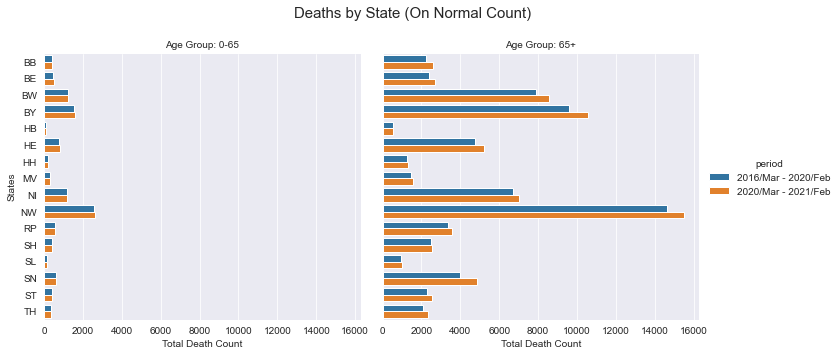

In [95]:
sns.set_style('darkgrid')

p1 = (sns.catplot(x='value', y='state_abbrv',
            hue='period', col='age',
            data=temp1, ci=None, kind='bar').set_axis_labels("Total Death Count", "States")
            .set_titles("Age Group: {col_name}")
)
p1.fig.subplots_adjust(top=.85)
p1.fig.suptitle("Deaths by State (On Normal Count)", fontsize=15)

# mplcursors.cursor(hover=True)

Text(0.5, 0.98, 'Deaths by State (On Deaths per 100000 population Count)')

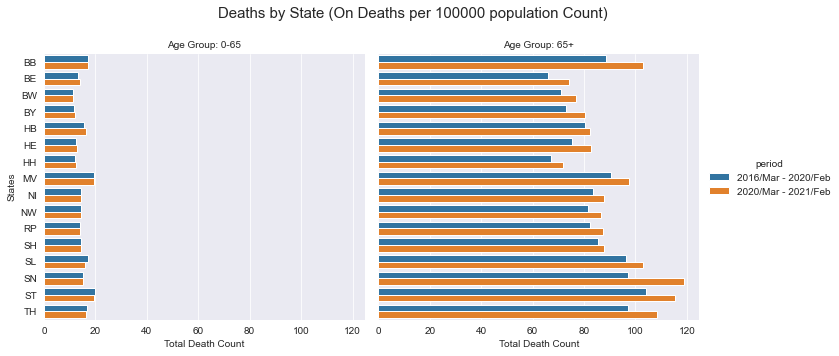

In [96]:
p2 = (sns.catplot(x='value', y='state_abbrv',
            hue='period', col='age',
            data=temp2, ci=None, kind='bar').set_axis_labels("Total Death Count", "States")
            .set_titles("Age Group: {col_name}")
)
p2.fig.subplots_adjust(top=.85)
p2.fig.suptitle("Deaths by State (On Deaths per 100000 population Count)", fontsize=15)


## Deaths by state and population density

In [97]:
# Data Aggregation 
data_dpp = data.groupby(['state_abbrv', 'period'], as_index=False).agg(deaths=('deaths','sum'), 
                                                                       pop_density= ('pop_density','min'), 
                                                                       population= ('population','min'))
display(data_dpp.head())

,state_abbrv,period,deaths,pop_density,population
0,BB,2016/Mar - 2020/Feb,2663.979167,85.0,2521893.0
1,BB,2020/Mar - 2021/Feb,3033.416667,85.0,2521893.0
2,BE,2016/Mar - 2020/Feb,2899.520833,4090.0,3669491.0
3,BE,2020/Mar - 2021/Feb,3232.583333,4090.0,3669491.0
4,BW,2016/Mar - 2020/Feb,9155.333333,311.0,11100394.0


In [98]:
# Again creating a new measure (Deaths per 100,000 population).
data_dpp['deaths_per_pop'] = data_dpp['deaths'] / data_dpp['population'] * 100000
display(data_dpp.head())

,state_abbrv,period,deaths,pop_density,population,deaths_per_pop
0,BB,2016/Mar - 2020/Feb,2663.979167,85.0,2521893.0,105.634108
1,BB,2020/Mar - 2021/Feb,3033.416667,85.0,2521893.0,120.283322
2,BE,2016/Mar - 2020/Feb,2899.520833,4090.0,3669491.0,79.016976
3,BE,2020/Mar - 2021/Feb,3232.583333,4090.0,3669491.0,88.093508
4,BW,2016/Mar - 2020/Feb,9155.333333,311.0,11100394.0,82.477553


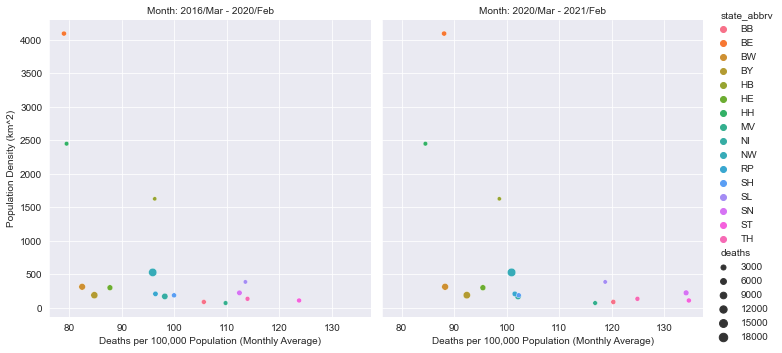

In [108]:
(sns.relplot(x='deaths_per_pop', y='pop_density',
             hue='state_abbrv', col = 'period', col_wrap=2, size = 'deaths', data=data_dpp)
.set(xlabel='Deaths per 100,000 Population (Monthly Average)', ylabel='Population Density (km^2)')
.set_titles('Month: {col_name}'))

In [65]:
# Redesining the dataframe to get the desired output.
data_dpp = data_dpp.pivot(index=['state_abbrv', 'pop_density'], columns = ['period'], values=['deaths', 'deaths_per_pop'])

In [66]:
display(data_dpp.head())

deaths                      \
period                  2016/Mar - 2020/Feb 2020/Mar - 2021/Feb   
state_abbrv pop_density                                           
BB          85.0                2663.979167         3033.416667   
BE          4090.0              2899.520833         3232.583333   
BW          311.0               9155.333333         9799.500000   
BY          186.0              11129.937500        12128.916667   
HB          1624.0               655.916667          671.666667   

                             deaths_per_pop                      
period                  2016/Mar - 2020/Feb 2020/Mar - 2021/Feb  
state_abbrv pop_density                                          
BB          85.0                 105.634108          120.283322  
BE          4090.0                79.016976           88.093508  
BW          311.0                 82.477553           88.280650  
BY          186.0                 84.801223           92.412645  
HB          1624.0                96.288130           98.600219

In [67]:
# Defining Column names.
data_dpp.columns = ['deaths_pre_covid_period', 
                    'deaths_covid_period',
                    'deaths_per_pop_pre_covid_period', 
                    'deaths_per_pop_covid_period']
display(data_dpp.head())

,,deaths_pre_covid_period,deaths_covid_period,deaths_per_pop_pre_covid_period,deaths_per_pop_covid_period
state_abbrv,pop_density,,,,
BB,85.0,2663.979167,3033.416667,105.634108,120.283322
BE,4090.0,2899.520833,3232.583333,79.016976,88.093508
BW,311.0,9155.333333,9799.500000,82.477553,88.280650
BY,186.0,11129.937500,12128.916667,84.801223,92.412645
HB,1624.0,655.916667,671.666667,96.288130,98.600219


In [68]:
# Reseting the index.
data_dpp = data_dpp.reset_index()
display(data_dpp.head())

,state_abbrv,pop_density,deaths_pre_covid_period,deaths_covid_period,deaths_per_pop_pre_covid_period,deaths_per_pop_covid_period
0,BB,85.0,2663.979167,3033.416667,105.634108,120.283322
1,BE,4090.0,2899.520833,3232.583333,79.016976,88.093508
2,BW,311.0,9155.333333,9799.500000,82.477553,88.280650
3,BY,186.0,11129.937500,12128.916667,84.801223,92.412645
4,HB,1624.0,655.916667,671.666667,96.288130,98.600219


In [69]:
# Adding a new column for mortality increase.
data_dpp['incr_mortality'] = (data_dpp.deaths_covid_period)/(data_dpp.deaths_pre_covid_period)-1

In [70]:
display(data_dpp)

,state_abbrv,pop_density,deaths_pre_covid_period,deaths_covid_period,deaths_per_pop_pre_covid_period,deaths_per_pop_covid_period,incr_mortality
0,BB,85.0,2663.979167,3033.416667,105.634108,120.283322,0.138679
1,BE,4090.0,2899.520833,3232.583333,79.016976,88.093508,0.114868
2,BW,311.0,9155.333333,9799.500000,82.477553,88.280650,0.070360
3,BY,186.0,11129.937500,12128.916667,84.801223,92.412645,0.089756
4,HB,1624.0,655.916667,671.666667,96.288130,98.600219,0.024012
5,HE,298.0,5518.791667,6003.250000,87.765926,95.470318,0.087783
6,HH,2446.0,1468.895833,1561.500000,79.517848,84.530922,0.063043
7,MV,69.0,1765.166667,1878.750000,109.764626,116.827660,0.064347
8,NI,168.0,7850.229167,8166.333333,98.206331,102.160793,0.040267
9,NW,526.0,17211.854167,18114.083333,95.902614,100.929739,0.052419
